In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import xarray as xr
from rich import pretty

import quantify_core.data.dataset_adapters as dadapters
import quantify_core.data.dataset_attrs as dattrs
from quantify_core.data import handling as dh
from quantify_core.utilities import dataset_examples
from quantify_core.utilities.examples_support import round_trip_dataset
from quantify_core.utilities.inspect_utils import display_source_code

pretty.install()

dh.set_datadir(Path.home() / "quantify-data")  # change me!

In [2]:
display_source_code(dataset_examples.mk_two_qubit_chevron_dataset)

def mk_two_qubit_chevron_dataset ( ** kwargs ) -> xr . Dataset : 
 """ 
 Generates a dataset that look similar to a two-qubit Chevron experiment. 

 Parameters 
 ---------- 
 **kwargs 
 Keyword arguments passed to :func:`~.mk_two_qubit_chevron_data`. 

 Returns 
 ------- 
 : 
 A mock Quantify dataset. 
 """ 
 amp_values , time_values , pop_q0 , pop_q1 = mk_two_qubit_chevron_data ( ** kwargs ) 

 dims_q0 = dims_q1 = ( "repetitions" , "main_dim" ) 
 pop_q0_attrs = mk_main_var_attrs ( 
 long_name = "Population Q0" , unit = "" , has_repetitions = True 
 ) 
 pop_q1_attrs = mk_main_var_attrs ( 
 long_name = "Population Q1" , unit = "" , has_repetitions = True 
 ) 
 data_vars = dict ( 
 pop_q0 = ( dims_q0 , pop_q0 , pop_q0_attrs ), 
 pop_q1 = ( dims_q1 , pop_q1 , pop_q1_attrs ), 
 ) 

 dims_amp = dims_time = ( "main_dim" ,) 
 amp_attrs = mk_main_coord_attrs ( long_name = "Amplitude" , unit = "V" ) 
 time_attrs = mk_main_coord_attrs ( long_name = "Time" , unit = "s" ) 
 coords = dict ( 
 amp = ( dims_amp , amp_values , amp_attrs ), 
 time = ( dims_time , time_values , time_attrs ), 
 ) 

 dataset_attrs = mk_dataset_attrs () 
 dataset = xr . Dataset ( data_vars = data_vars , coords = coords , attrs = dataset_attrs ) 

 return dataset

In [3]:
dataset = dataset_examples.mk_two_qubit_chevron_dataset()

assert dataset == round_trip_dataset(dataset)  # confirm read/write

In [4]:
dataset

<xarray.Dataset>
Dimensions: (repetitions: 5, main_dim: 1200)
Coordinates:
 amp (main_dim) float64 0.45 0.4534 0.4569 0.4603 ... 0.5431 0.5466 0.55
 time (main_dim) float64 0.0 0.0 0.0 0.0 0.0 ... 1e-07 1e-07 1e-07 1e-07
Dimensions without coordinates: repetitions, main_dim
Data variables:
 pop_q0 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.4886 0.4818 0.5
 pop_q1 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.5243 0.5371 0.5
Attributes:
 tuid: 20230926-194340-851-8a0f58
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: []
 json_serialize_exclude: [] xarray.Dataset Dimensions: repetitions : 5 main_dim : 1200 Coordinates: (2) amp (main_dim) float64 0.45 0.4534 0.4569 ... 0.5466 0.55 unit : V long_name : Amplitude is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.45 , 0.45344828, 0.45689655, ..., 0.54310345, 0.54655172,
 0.55 ]) time (main_dim) float64 0.0 0.0 0.0 ... 1e-07 1e-07 1e-07 unit : s long_name : Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.e+00, 0.e+00, 0.e+00, ..., 1.e-07, 1.e-07, 1.e-07]) Data variables: (2) pop_q0 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.4886 0.4818 0.5 unit : long_name : Population Q0 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[0.5 , 0.5 , 0.5 , ..., 0.47934742, 0.45911157,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.48484689, 0.46978367,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.47697503, 0.48068839,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.4903811 , 0.45931355,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.48855559, 0.48175285,
 0.5 ]]) pop_q1 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.5243 0.5371 0.5 unit : long_name : Population Q1 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[0.5 , 0.5 , 0.5 , ..., 0.51325446, 0.53973285,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.50964979, 0.52643865,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.51995816, 0.54094941,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.51040954, 0.53633277,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.52434067, 0.53709612,
 0.5 ]]) Attributes: (9) tuid : 20230926-194340-851-8a0f58 dataset_name : dataset_state : None timestamp_start : None timestamp_end : None quantify_dataset_version : 2.0.0 software_versions : {} relationships : [] json_serialize_exclude : []

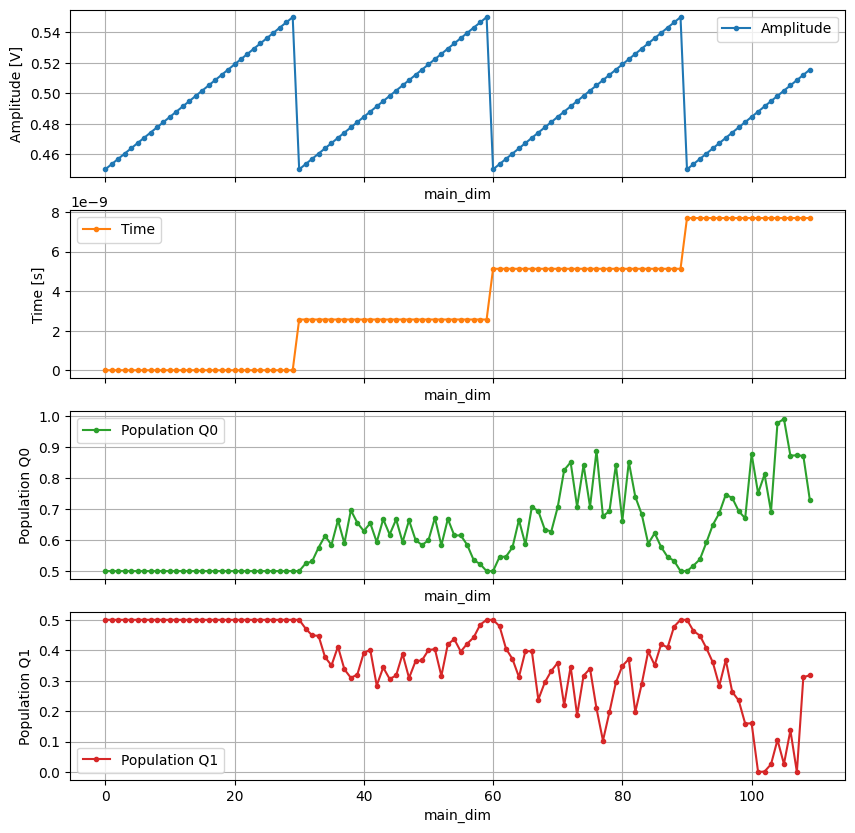

In [5]:
n_points = 110  # only plot a few points for clarity
_, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 10))
dataset.amp[:n_points].plot(
    ax=axs[0], marker=".", color="C0", label=dataset.amp.long_name
)
dataset.time[:n_points].plot(
    ax=axs[1], marker=".", color="C1", label=dataset.time.long_name
)
_ = dataset.pop_q0.sel(repetitions=0)[:n_points].plot(
    ax=axs[2], marker=".", color="C2", label=dataset.pop_q0.long_name
)
_ = dataset.pop_q1.sel(repetitions=0)[:n_points].plot(
    ax=axs[3], marker=".", color="C3", label=dataset.pop_q1.long_name
)
for ax in axs:
    ax.legend()
    ax.grid()

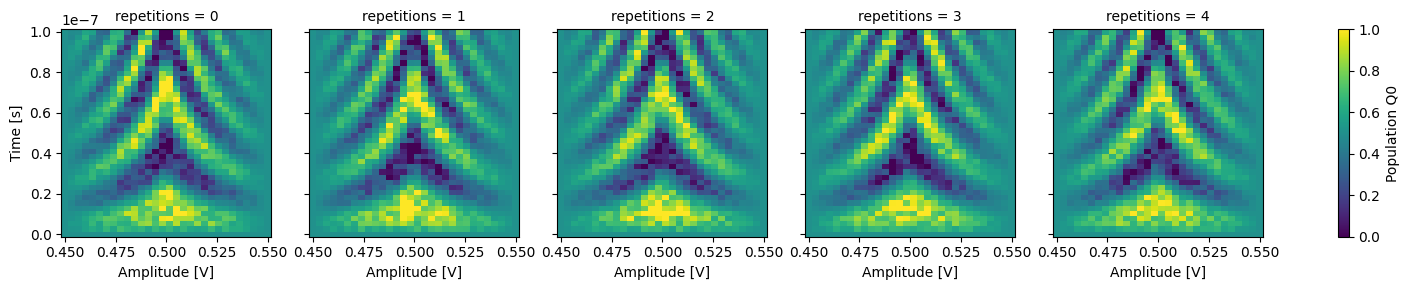

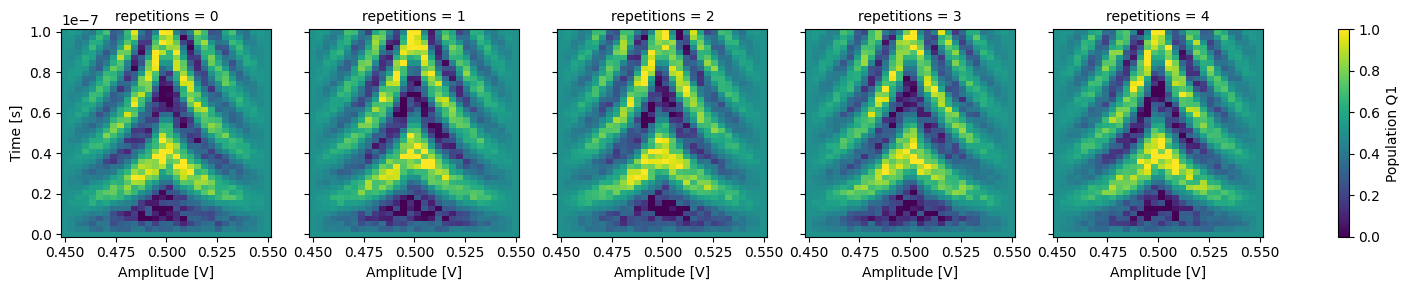

In [6]:
dataset_gridded = dh.to_gridded_dataset(
    dataset,
    dimension="main_dim",
    coords_names=dattrs.get_main_coords(dataset),
)
dataset_gridded.pop_q0.plot.pcolormesh(x="amp", col="repetitions")
_ = dataset_gridded.pop_q1.plot.pcolormesh(x="amp", col="repetitions")

In [7]:
coord_dims = ("repetitions",)
coord_values = ["A", "B", "C", "D", "E"]
dataset_indexed_rep = xr.Dataset(coords=dict(repetitions=(coord_dims, coord_values)))

dataset_indexed_rep

<xarray.Dataset>
Dimensions: (repetitions: 5)
Coordinates:
 * repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E'
Data variables:
 *empty* xarray.Dataset Dimensions: repetitions : 5 Coordinates: (1) repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E' array(['A', 'B', 'C', 'D', 'E'], dtype='<U1') Data variables: (0) Attributes: (0)

In [8]:
# merge with the previous dataset
dataset_rep = dataset.merge(dataset_indexed_rep, combine_attrs="drop_conflicts")

assert dataset_rep == round_trip_dataset(dataset_rep)  # confirm read/write

dataset_rep

<xarray.Dataset>
Dimensions: (repetitions: 5, main_dim: 1200)
Coordinates:
 amp (main_dim) float64 0.45 0.4534 0.4569 ... 0.5431 0.5466 0.55
 time (main_dim) float64 0.0 0.0 0.0 0.0 ... 1e-07 1e-07 1e-07 1e-07
 * repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E'
Dimensions without coordinates: main_dim
Data variables:
 pop_q0 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.4818 0.5
 pop_q1 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.5371 0.5
Attributes:
 tuid: 20230926-194340-851-8a0f58
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: []
 json_serialize_exclude: [] xarray.Dataset Dimensions: repetitions : 5 main_dim : 1200 Coordinates: (3) amp (main_dim) float64 0.45 0.4534 0.4569 ... 0.5466 0.55 unit : V long_name : Amplitude is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.45 , 0.45344828, 0.45689655, ..., 0.54310345, 0.54655172,
 0.55 ]) time (main_dim) float64 0.0 0.0 0.0 ... 1e-07 1e-07 1e-07 unit : s long_name : Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.e+00, 0.e+00, 0.e+00, ..., 1.e-07, 1.e-07, 1.e-07]) repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E' array(['A', 'B', 'C', 'D', 'E'], dtype='<U1') Data variables: (2) pop_q0 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.4886 0.4818 0.5 unit : long_name : Population Q0 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[0.5 , 0.5 , 0.5 , ..., 0.47934742, 0.45911157,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.48484689, 0.46978367,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.47697503, 0.48068839,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.4903811 , 0.45931355,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.48855559, 0.48175285,
 0.5 ]]) pop_q1 (repetitions, main_dim) float64 0.5 0.5 0.5 ... 0.5243 0.5371 0.5 unit : long_name : Population Q1 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[0.5 , 0.5 , 0.5 , ..., 0.51325446, 0.53973285,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.50964979, 0.52643865,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.51995816, 0.54094941,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.51040954, 0.53633277,
 0.5 ],
 [0.5 , 0.5 , 0.5 , ..., 0.52434067, 0.53709612,
 0.5 ]]) Attributes: (9) tuid : 20230926-194340-851-8a0f58 dataset_name : dataset_state : None timestamp_start : None timestamp_end : None quantify_dataset_version : 2.0.0 software_versions : {} relationships : [] json_serialize_exclude : []

In [9]:
dataset_gridded = dh.to_gridded_dataset(
    dataset_rep,
    dimension="main_dim",
    coords_names=dattrs.get_main_coords(dataset),
)
dataset_gridded

<xarray.Dataset>
Dimensions: (amp: 30, time: 40, repetitions: 5)
Coordinates:
 * amp (amp) float64 0.45 0.4534 0.4569 0.4603 ... 0.5431 0.5466 0.55
 * time (time) float64 0.0 2.564e-09 5.128e-09 ... 9.744e-08 1e-07
 * repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E'
Data variables:
 pop_q0 (repetitions, amp, time) float64 0.5 0.5 0.5 ... 0.5 0.5 0.5
 pop_q1 (repetitions, amp, time) float64 0.5 0.5 0.5 ... 0.5 0.5 0.5
Attributes:
 tuid: 20230926-194340-851-8a0f58
 dataset_name: 
 dataset_state: None
 timestamp_start: None
 timestamp_end: None
 quantify_dataset_version: 2.0.0
 software_versions: {}
 relationships: []
 json_serialize_exclude: [] xarray.Dataset Dimensions: amp : 30 time : 40 repetitions : 5 Coordinates: (3) amp (amp) float64 0.45 0.4534 0.4569 ... 0.5466 0.55 unit : V long_name : Amplitude is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.45 , 0.453448, 0.456897, 0.460345, 0.463793, 0.467241, 0.47069 ,
 0.474138, 0.477586, 0.481034, 0.484483, 0.487931, 0.491379, 0.494828,
 0.498276, 0.501724, 0.505172, 0.508621, 0.512069, 0.515517, 0.518966,
 0.522414, 0.525862, 0.52931 , 0.532759, 0.536207, 0.539655, 0.543103,
 0.546552, 0.55 ]) time (time) float64 0.0 2.564e-09 ... 9.744e-08 1e-07 unit : s long_name : Time is_main_coord : True uniformly_spaced : True is_dataset_ref : False json_serialize_exclude : [] array([0.000000e+00, 2.564103e-09, 5.128205e-09, 7.692308e-09, 1.025641e-08,
 1.282051e-08, 1.538462e-08, 1.794872e-08, 2.051282e-08, 2.307692e-08,
 2.564103e-08, 2.820513e-08, 3.076923e-08, 3.333333e-08, 3.589744e-08,
 3.846154e-08, 4.102564e-08, 4.358974e-08, 4.615385e-08, 4.871795e-08,
 5.128205e-08, 5.384615e-08, 5.641026e-08, 5.897436e-08, 6.153846e-08,
 6.410256e-08, 6.666667e-08, 6.923077e-08, 7.179487e-08, 7.435897e-08,
 7.692308e-08, 7.948718e-08, 8.205128e-08, 8.461538e-08, 8.717949e-08,
 8.974359e-08, 9.230769e-08, 9.487179e-08, 9.743590e-08, 1.000000e-07]) repetitions (repetitions) <U1 'A' 'B' 'C' 'D' 'E' array(['A', 'B', 'C', 'D', 'E'], dtype='<U1') Data variables: (2) pop_q0 (repetitions, amp, time) float64 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 unit : long_name : Population Q0 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.52462974, 0.54556513, ..., 0.49369154,
 0.46593909, 0.47829501],
 [0.5 , 0.53096479, 0.54671207, ..., 0.58439532,
 0.52840192, 0.48526448],
 ...,
 [0.5 , 0.53554992, 0.54556213, ..., 0.53421524,
 0.52683234, 0.47934742],
 [0.5 , 0.52263221, 0.53324799, ..., 0.49520272,
 0.48292625, 0.45911157],
 [0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ]],

 [[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.511993 , 0.54040107, ..., 0.49323746,
 0.46472548, 0.4717735 ],
 [0.5 , 0.53839618, 0.59404155, ..., 0.57712699,
 0.52809145, 0.47479363],
...
 [0.5 , 0.5543903 , 0.56225336, ..., 0.55717664,
 0.54072803, 0.4903811 ],
 [0.5 , 0.51269098, 0.51747944, ..., 0.49306189,
 0.46207336, 0.45931355],
 [0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ]],

 [[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.53282701, 0.53331208, ..., 0.49573131,
 0.46313136, 0.45196851],
 [0.5 , 0.52376577, 0.55784942, ..., 0.58932903,
 0.52031397, 0.47580372],
 ...,
 [0.5 , 0.53875118, 0.57789726, ..., 0.53942745,
 0.52059331, 0.48855559],
 [0.5 , 0.52515217, 0.54606107, ..., 0.49641976,
 0.46010524, 0.48175285],
 [0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ]]]) pop_q1 (repetitions, amp, time) float64 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5 unit : long_name : Population Q1 is_main_var : True uniformly_spaced : True grid : True is_dataset_ref : False has_repetitions : True json_serialize_exclude : [] array([[[0.5 , 0.5 , 0.5 , ..., 0.5 ,
 0.5 , 0.5 ],
 [0.5 , 0.47119973, 0.47901959, ..., 0.50297437,
 0.51760087, 0.54529387],
 [0.5 , 0.44878307, 0.40519978, ..., 0.42239416,
 0.46766323, 0.52530065],
 ...,
 [0.5 , 0.44208814, 0.40902762, 

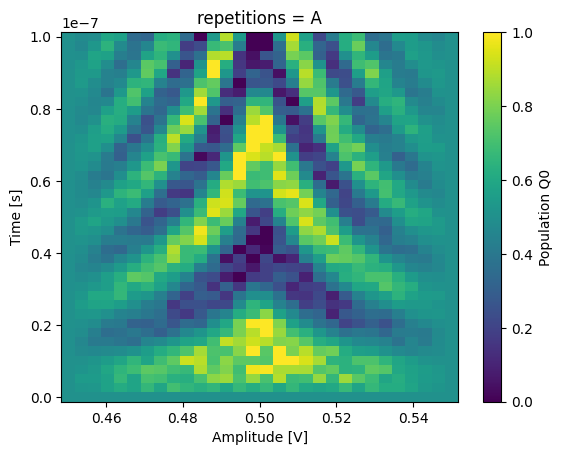

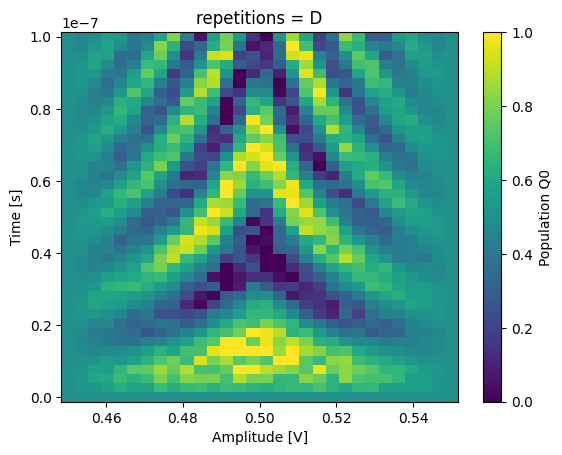

In [10]:
_ = dataset_gridded.pop_q0.sel(repetitions="A").plot(x="amp")
plt.show()
_ = dataset_gridded.pop_q0.sel(repetitions="D").plot(x="amp")

In [11]:
# pylint: disable=line-too-long
# pylint: disable=wrong-import-order
# pylint: disable=wrong-import-position
# pylint: disable=pointless-string-statement
# pylint: disable=duplicate-code

In [12]:
import pendulum

from quantify_core.utilities import examples_support

examples_support.mk_dataset_attrs(
    dataset_name="Bias scan",
    timestamp_start=pendulum.now().to_iso8601_string(),
    timestamp_end=pendulum.now().add(minutes=2).to_iso8601_string(),
    dataset_state="done",
)

{
    'tuid': '20230926-194343-406-e5bcea',
    'dataset_name': 'Bias scan',
    'dataset_state': 'done',
    'timestamp_start': '2023-09-26T19:43:43.406197+02:00',
    'timestamp_end': '2023-09-26T19:45:43.406238+02:00',
    'quantify_dataset_version': '2.0.0',
    'software_versions': {},
    'relationships': [],
    'json_serialize_exclude': []
}

In [13]:
# pylint: disable=line-too-long
# pylint: disable=wrong-import-order
# pylint: disable=wrong-import-position
# pylint: disable=pointless-string-statement
# pylint: disable=duplicate-code

In [14]:
import pendulum

from quantify_core.utilities import examples_support

examples_support.mk_dataset_attrs(
    dataset_name="My experiment",
    timestamp_start=pendulum.now().to_iso8601_string(),
    timestamp_end=pendulum.now().add(minutes=2).to_iso8601_string(),
    software_versions={
        "lab_fridge_magnet_driver": "v1.4.2",  # software version/tag
        "my_lab_repo": "9d8acf63f48c469c1b9fa9f2c3cf230845f67b18",  # git commit hash
    },
)

{
    'tuid': '20230926-194343-423-7ca250',
    'dataset_name': 'My experiment',
    'dataset_state': None,
    'timestamp_start': '2023-09-26T19:43:43.423773+02:00',
    'timestamp_end': '2023-09-26T19:45:43.423819+02:00',
    'quantify_dataset_version': '2.0.0',
    'software_versions': {
        'lab_fridge_magnet_driver': 'v1.4.2',
        'my_lab_repo': '9d8acf63f48c469c1b9fa9f2c3cf230845f67b18'
    },
    'relationships': [],
    'json_serialize_exclude': []
}

In [15]:
# pylint: disable=duplicate-code
# pylint: disable=wrong-import-position

In [16]:
from quantify_core.data.dataset_attrs import QDatasetIntraRelationship
from quantify_core.utilities import examples_support

attrs = examples_support.mk_dataset_attrs(
    relationships=[
        QDatasetIntraRelationship(
            item_name="q0",
            relation_type="calibration",
            related_names=["q0_cal"],
        ).to_dict()
    ]
)

In [17]:
from quantify_core.data.dataset_attrs import QDatasetAttrs

# tip: to_json and from_dict, from_json  are also available
dataset.attrs = QDatasetAttrs().to_dict()
dataset.attrs

{
    'tuid': None,
    'dataset_name': '',
    'dataset_state': None,
    'timestamp_start': None,
    'timestamp_end': None,
    'quantify_dataset_version': '2.0.0',
    'software_versions': {},
    'relationships': [],
    'json_serialize_exclude': []
}

In [18]:
dataset.quantify_dataset_version, dataset.tuid

('2.0.0', None)

In [19]:
# pylint: disable=line-too-long
# pylint: disable=wrong-import-order
# pylint: disable=wrong-import-position
# pylint: disable=pointless-string-statement
# pylint: disable=duplicate-code

In [20]:
from quantify_core.utilities import examples_support

examples_support.mk_main_coord_attrs()

{
    'unit': '',
    'long_name': '',
    'is_main_coord': True,
    'uniformly_spaced': True,
    'is_dataset_ref': False,
    'json_serialize_exclude': []
}

In [21]:
examples_support.mk_secondary_coord_attrs()

{
    'unit': '',
    'long_name': '',
    'is_main_coord': False,
    'uniformly_spaced': True,
    'is_dataset_ref': False,
    'json_serialize_exclude': []
}

In [22]:
dataset.amp.attrs

{
    'unit': 'V',
    'long_name': 'Amplitude',
    'is_main_coord': True,
    'uniformly_spaced': True,
    'is_dataset_ref': False,
    'json_serialize_exclude': []
}

In [23]:
# pylint: disable=line-too-long
# pylint: disable=wrong-import-order
# pylint: disable=wrong-import-position
# pylint: disable=pointless-string-statement
# pylint: disable=duplicate-code

In [24]:
from quantify_core.utilities import examples_support

examples_support.mk_main_var_attrs(coords=["time"])

{
    'unit': '',
    'long_name': '',
    'is_main_var': True,
    'uniformly_spaced': True,
    'grid': True,
    'is_dataset_ref': False,
    'has_repetitions': False,
    'json_serialize_exclude': [],
    'coords': ['time']
}

In [25]:
examples_support.mk_secondary_var_attrs(coords=["cal"])

{
    'unit': '',
    'long_name': '',
    'is_main_var': False,
    'uniformly_spaced': True,
    'grid': True,
    'is_dataset_ref': False,
    'has_repetitions': False,
    'json_serialize_exclude': [],
    'coords': ['cal']
}

In [26]:
dataset.pop_q0.attrs

{
    'unit': '',
    'long_name': 'Population Q0',
    'is_main_var': True,
    'uniformly_spaced': True,
    'grid': True,
    'is_dataset_ref': False,
    'has_repetitions': True,
    'json_serialize_exclude': []
}

In [27]:
display_source_code(dh.write_dataset)
display_source_code(dh.load_dataset)

def write_dataset ( path : Union [ Path , str ], dataset : xr . Dataset ) -> None : 
 """ 
 Writes a :class:`~xarray.Dataset` to a file with the `h5netcdf` engine. 

 Before writing the 
 :meth:`AdapterH5NetCDF.adapt() <quantify_core.data.dataset_adapters.AdapterH5NetCDF.adapt>` 
 is applied. 

 To accommodate for complex-type numbers and arrays ``invalid_netcdf=True`` is used. 

 Parameters 
 ---------- 
 path 
 Path to the file including filename and extension 
 dataset 
 The :class:`~xarray.Dataset` to be written to file. 
 """ # pylint: disable=line-too-long 
 _xarray_numpy_bool_patch ( dataset ) # See issue #161 in quantify-core 
 # Only quantify_dataset_version=>2.0.0 requires the adapter 
 if "quantify_dataset_version" in dataset . attrs : 
 dataset = da . AdapterH5NetCDF . adapt ( dataset ) 
 dataset . to_netcdf ( path , engine = "h5netcdf" , invalid_netcdf = True )

def load_dataset ( 
 tuid : TUID , datadir : str = None , name : str = DATASET_NAME 
 ) -> xr . Dataset : 
 """ 
 Loads a dataset specified by a tuid. 

 .. tip:: 

 This method also works when specifying only the first part of a 
 :class:`~quantify_core.data.types.TUID`. 

 .. note:: 

 This method uses :func:`~.load_dataset` to ensure the file is closed after 
 loading as datasets are intended to be immutable after performing the initial 
 experiment. 

 Parameters 
 ---------- 
 tuid 
 A :class:`~quantify_core.data.types.TUID` string. It is also possible to specify 
 only the first part of a tuid. 
 datadir 
 Path of the data directory. If ``None``, uses :meth:`~get_datadir` to determine 
 the data directory. 
 Returns 
 ------- 
 : 
 The dataset. 
 Raises 
 ------ 
 FileNotFoundError 
 No data found for specified date. 
 """ 
 return load_dataset_from_path ( _locate_experiment_file ( tuid , datadir , name ))

In [28]:
display_source_code(dadapters.AdapterH5NetCDF)

class AdapterH5NetCDF ( DatasetAdapterBase ): 
 """ 
 Quantify dataset adapter for the ``h5netcdf`` engine. 

 It has the functionality of adapting the Quantify dataset to a format compatible 
 with the ``h5netcdf`` xarray backend engine that is used to write and load the 
 dataset to/from disk. 

 .. warning:: 

 The ``h5netcdf`` engine has minor issues when performing a two-way trip of the 
 dataset. The ``type`` of some attributes are not preserved. E.g., list- and 
 tuple-like objects are loaded as numpy arrays of ``dtype=object``. 
 """ 

 @classmethod 
 def adapt ( cls , dataset : xr . Dataset ) -> xr . Dataset : 
 """ 
 Serializes to JSON the dataset and variables attributes. 

 To prevent the JSON serialization for specific items, their names should be 
 listed under the attribute named ``json_serialize_exclude`` (for each ``attrs`` 
 dictionary). 

 Parameters 
 ---------- 
 dataset 
 Dataset that needs to be adapted. 

 Returns 
 ------- 
 : 
 Dataset in which the attributes have been replaced with their JSON strings 
 version. 
 """ 

 return cls . _transform ( dataset , vals_converter = json . dumps ) 

 @classmethod 
 def recover ( cls , dataset : xr . Dataset ) -> xr . Dataset : 
 """ 
 Reverts the action of ``.adapt()``. 

 To prevent the JSON de-serialization for specific items, their names should be 
 listed under the attribute named ``json_serialize_exclude`` 
 (for each ``attrs`` dictionary). 

 Parameters 
 ---------- 
 dataset 
 Dataset from which to recover the original format. 

 Returns 
 ------- 
 : 
 Dataset in which the attributes have been replaced with their python objects 
 version. 
 """ 

 return cls . _transform ( dataset , vals_converter = json . loads ) 

 @staticmethod 
 def attrs_convert ( 
 attrs : dict , 
 inplace : bool = False , 
 vals_converter : Callable [ Any , Any ] = json . dumps , 
 ) -> dict : 
 """ 
 Converts to/from JSON string the values of the keys which are not listed in the 
 ``json_serialize_exclude`` list. 

 Parameters 
 ---------- 
 attrs 
 The input dictionary. 
 inplace 
 If ``True`` the values are replaced in place, otherwise a deepcopy of 
 ``attrs`` is performed first. 
 """ 
 json_serialize_exclude = attrs . get ( "json_serialize_exclude" , []) 

 attrs = attrs if inplace else deepcopy ( attrs ) 
 for attr_name , attr_val in attrs . items (): 
 if attr_name not in json_serialize_exclude : 
 attrs [ attr_name ] = vals_converter ( attr_val ) 
 return attrs 

 @classmethod 
 def _transform ( 
 cls , dataset : xr . Dataset , vals_converter : Callable [ Any , Any ] = json . dumps 
 ) -> xr . Dataset : 
 dataset = xr . Dataset ( 
 dataset , 
 attrs = cls . attrs_convert ( 
 dataset . attrs , inplace = False , vals_converter = vals_converter 
 ), 
 ) 

 for var_name in dataset . variables . keys (): 
 # The new dataset generated above has already a deepcopy of the attributes. 
 _ = cls . attrs_convert ( 
 dataset [ var_name ] . attrs , inplace = True , vals_converter = vals_converter 
 ) 

 return dataset